# Exploratory Data Analysis (EDA) of the UNSW-NB15 Dataset

This notebook aims to perform a thorough exploration of the UNSW-NB15 dataset, which is designed for anomaly detection in network traffic. We'll analyze key features, handle missing values, study distributions, and investigate potential patterns in normal and malicious traffic. Each step includes Markdown explanations for easy reference.


## 1. Loading Libraries and Data

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = r'C:\Users\USER\UEBA_Project\anomaly_detection\data\raw\UNSW_NB15_training-set.csv'  
df = pd.read_csv(data_path)


## Introduction
The UNSW-NB15 dataset is used in anomaly detection in network traffic. It contains normal and attack traffic logs with various attack types (DoS, fuzzers, backdoor, etc.). Each row represents a network connection, with detailed attributes on connection duration, protocol, state, packets, and attack labels.


## 2. Data Overview

In [5]:
# Display first few rows
df.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


##### First 5 Rows of the Dataset
This preview shows the dataset's initial rows and provides a quick look at each feature and data format.


## 3. Checking for Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


Series([], dtype: int64)

### Handling Missing Values
Checking for missing values is crucial, as they can impact model training. We'll decide whether to impute or drop rows/columns based on the extent of missing data in each feature.


## 4. Data Type Conversion

In [7]:
# Convert object types to 'category' where applicable for efficiency
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


### Data Type Conversion
We convert some object columns to 'category' type, which optimizes memory usage. This also speeds up operations on categorical columns, particularly in large datasets.


## 5. Statistical Summary of Numerical Features


In [8]:
# Display summary statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


### Statistical Summary
The summary statistics (count, mean, std, min, max, and percentiles) provide an initial sense of the data range and distribution. We can identify possible outliers and understand data spread.


## 6. Univariate Analysis
###### Distribution of Numerical Features

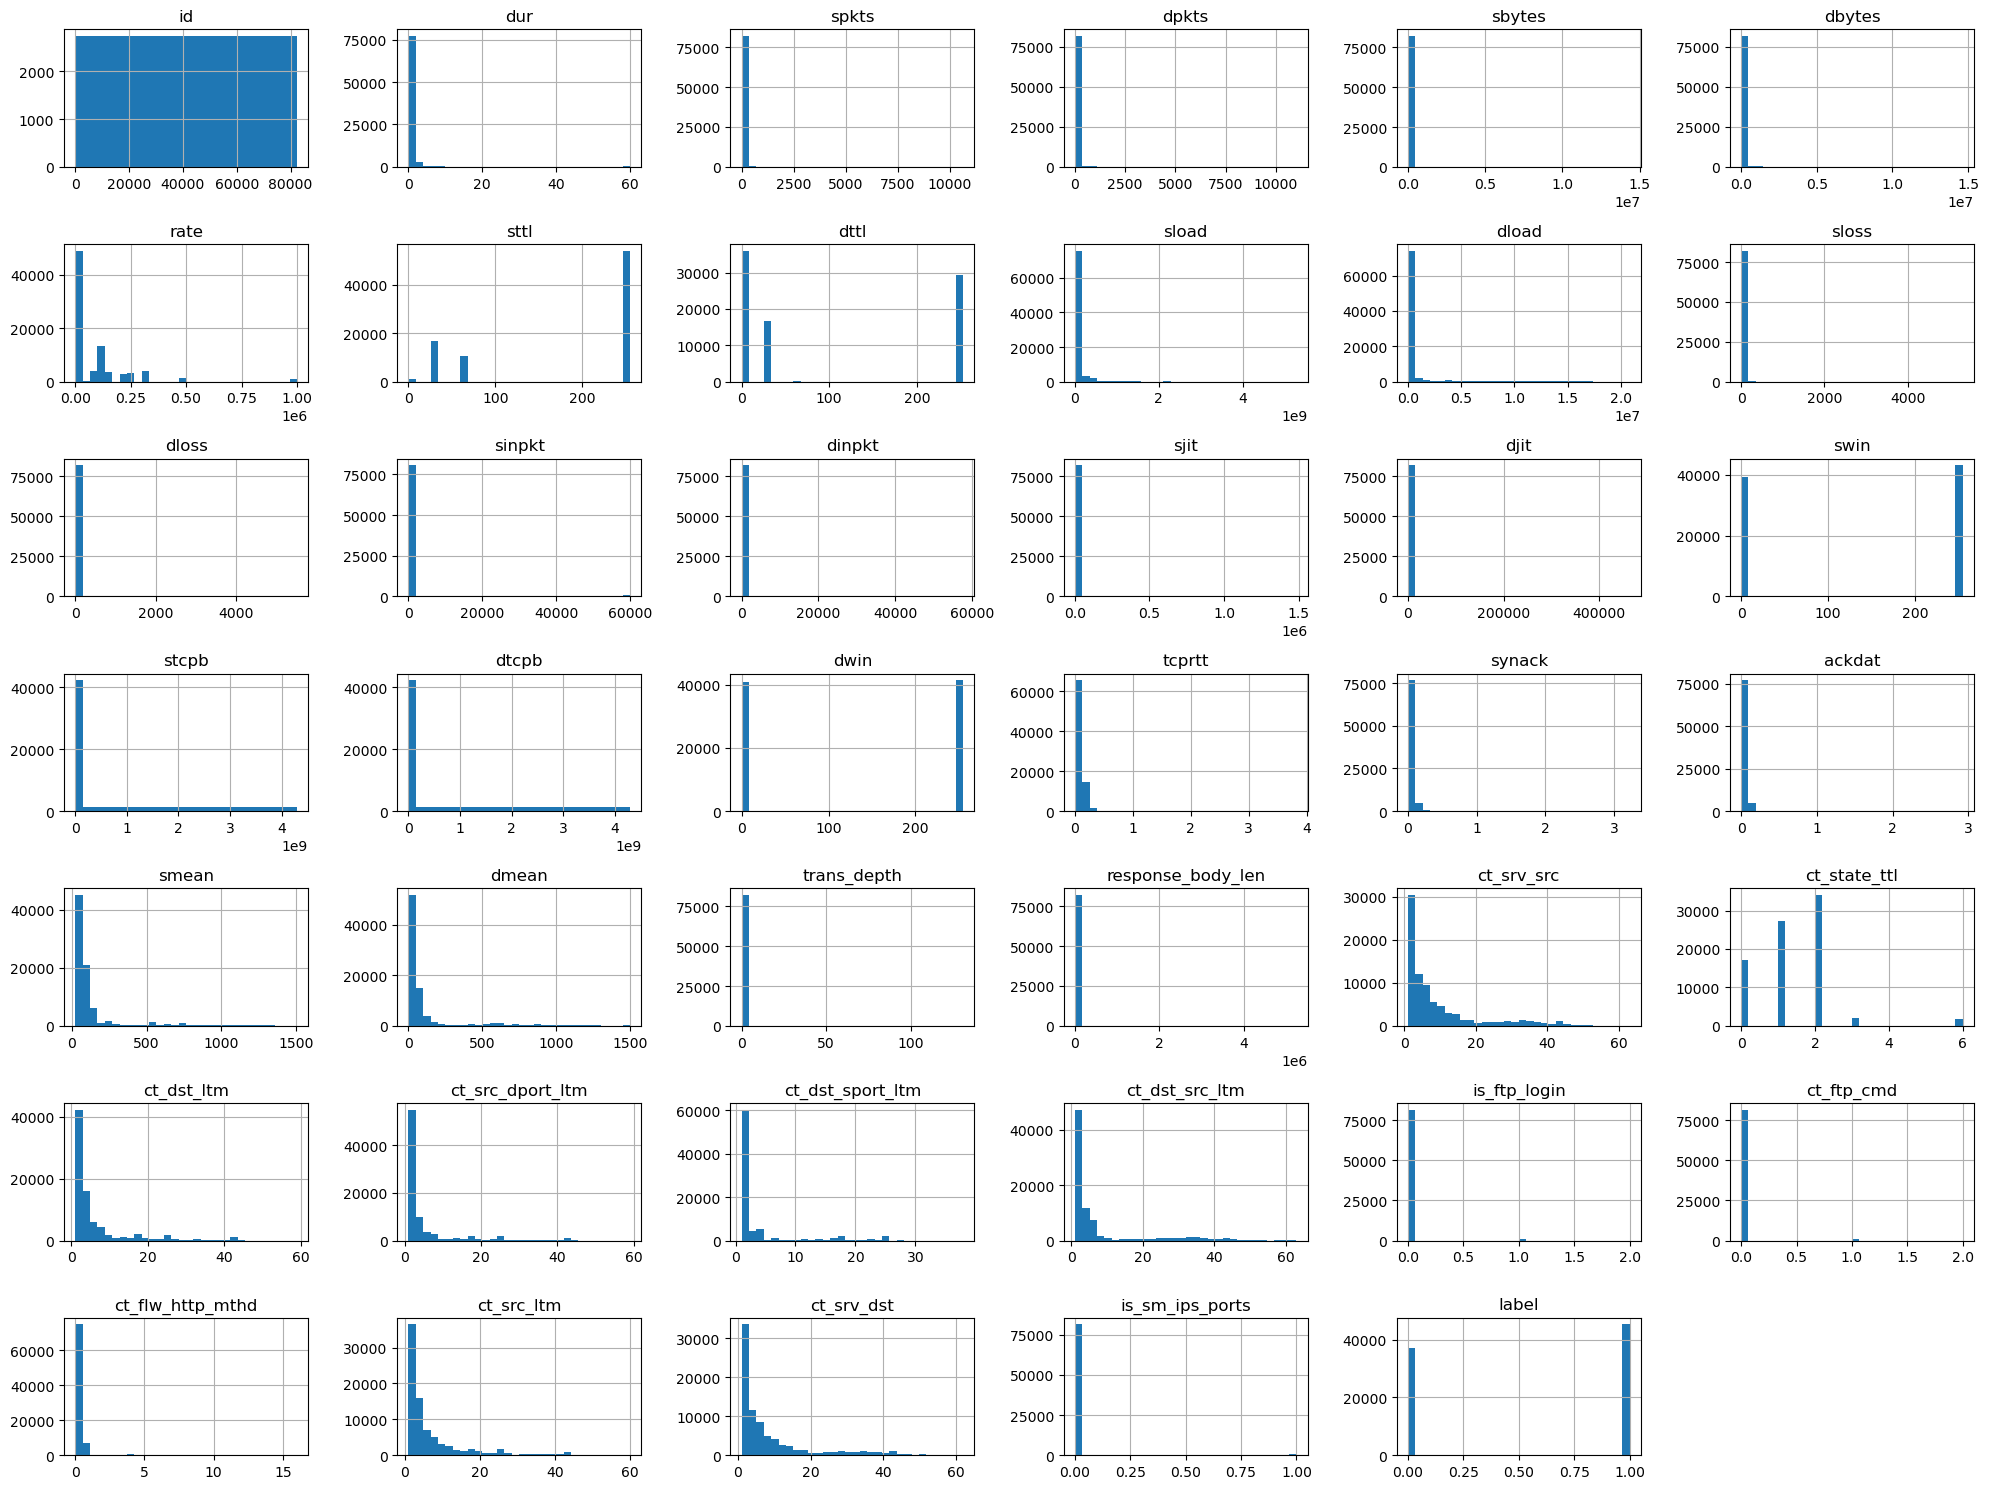

In [9]:
# Plot histograms for numerical columns
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()


#### Distribution of Numerical Features
Histograms reveal the distribution of each numerical feature, highlighting any skewed or normal distributions and potential outliers.


#### Distribution of Categorical Features

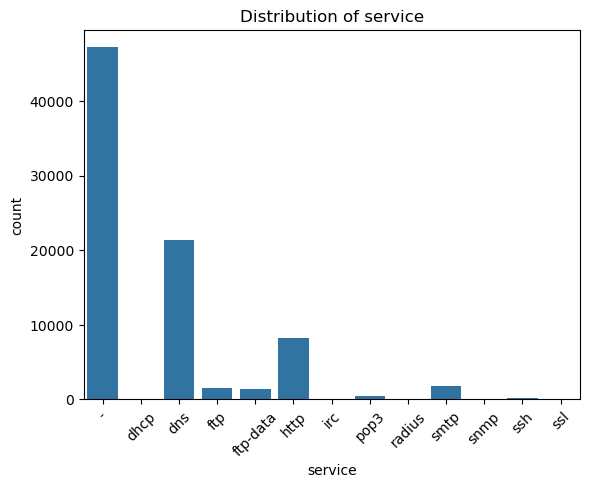

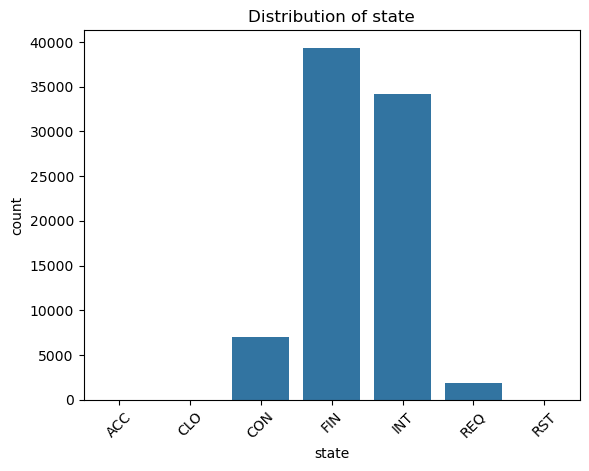

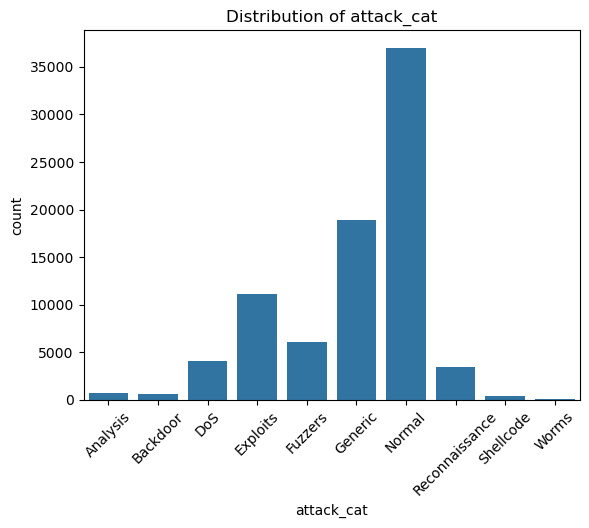

In [11]:
# Plot categorical feature distributions
for col in [ 'service', 'state', 'attack_cat']:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


##### Distribution of Categorical Features
Visualizing the count of each category in columns like `proto`, `state`, and `attack_cat` helps us understand the diversity of network protocols, states, and attack categories in the dataset.


## 7. Attack Category Analysis

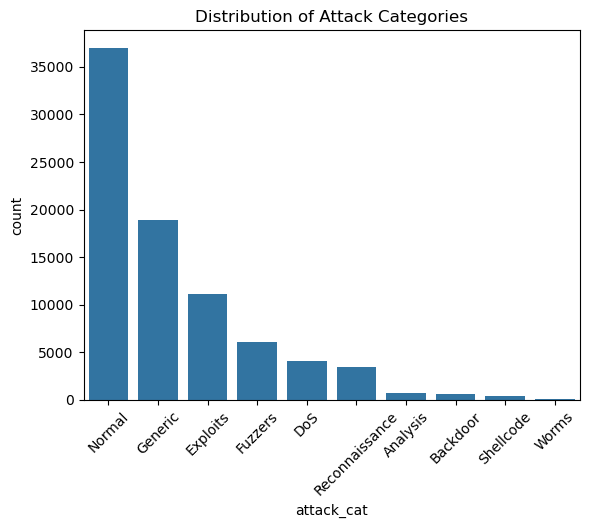

In [12]:
# Plot attack category distribution
sns.countplot(data=df, x='attack_cat', order=df['attack_cat'].value_counts().index)
plt.title('Distribution of Attack Categories')
plt.xticks(rotation=45)
plt.show()


### Attack Category Distribution
Understanding the distribution of attacks is essential for anomaly detection. The dataset is imbalanced, with more normal traffic than attacks, which affects model training and evaluation.


## 8. Feature Correlation

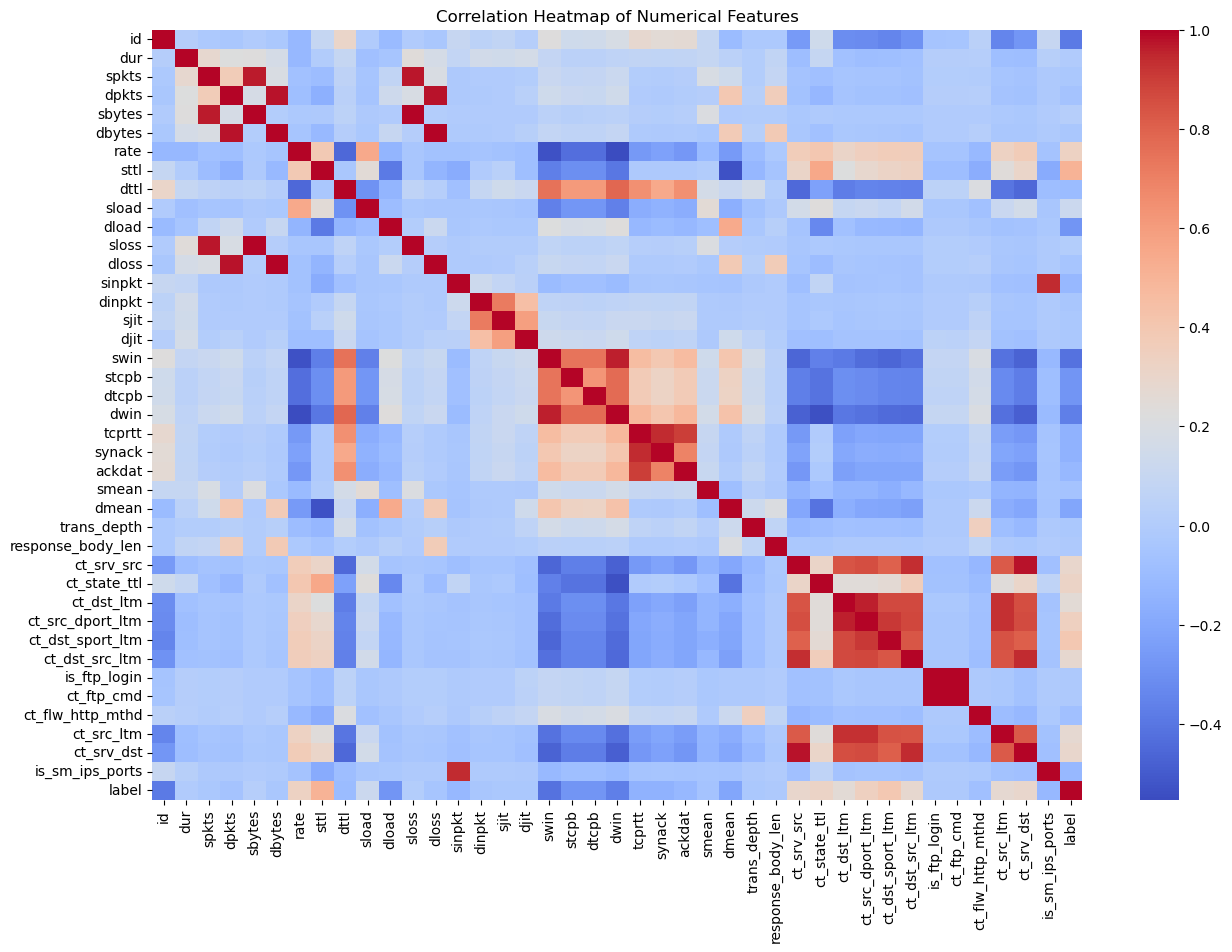

In [14]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


##### Feature Correlation
This heatmap shows correlations between numerical features. High correlation (positive or negative) between features might indicate redundancy, which could impact model performance. We may consider dimensionality reduction techniques to address this.


## 9. Outliers Detection

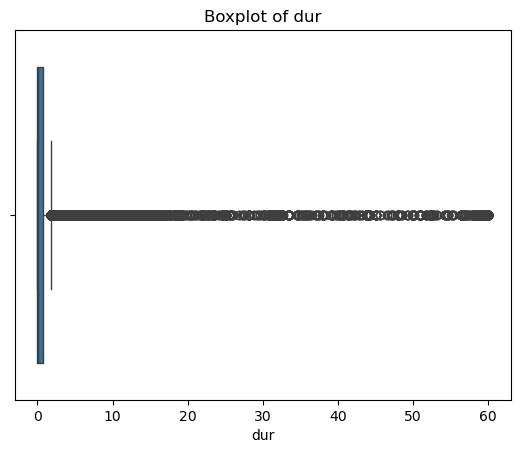

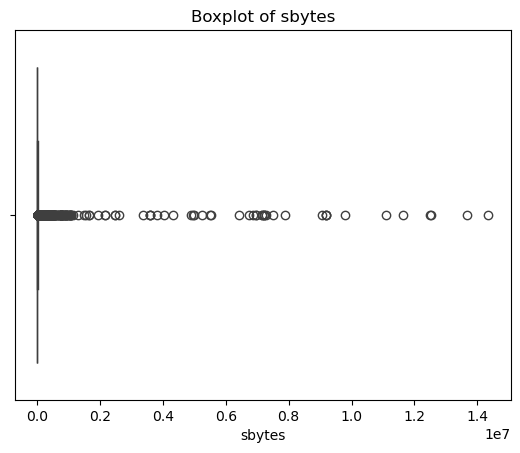

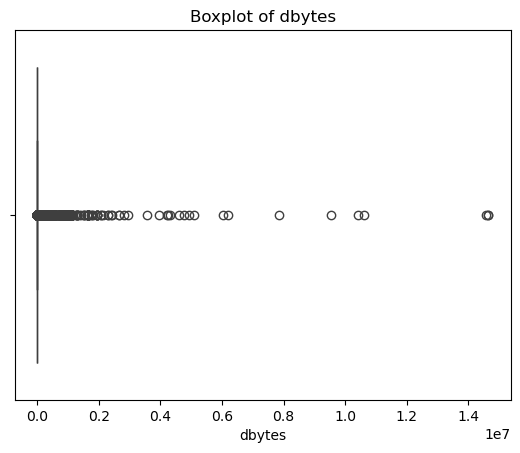

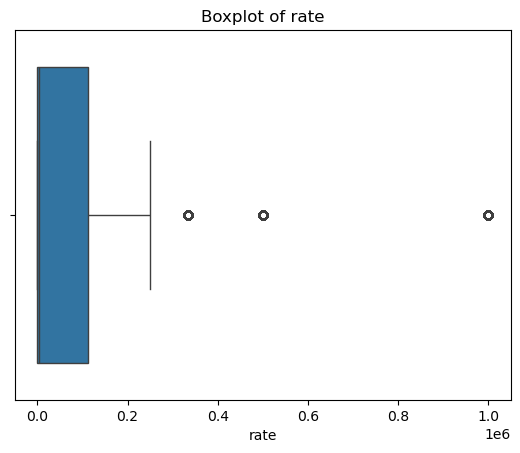

In [15]:
# Boxplot for selected features to detect outliers
selected_features = ['dur', 'sbytes', 'dbytes', 'rate']
for feature in selected_features:
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()


##### Outliers Detection
Boxplots help identify outliers in key features like `duration`, `sbytes`, `dbytes`, and `rate`. Outliers can skew the model and may need to be handled before training.


## 10. Feature Engineering Insights

In [16]:
# Example of feature engineering: packet ratio (source packets to destination packets)
df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)  # Add 1 to avoid division by zero



##### Feature Engineering
Creating a new feature like `pkt_ratio` (source packets to destination packets ratio) may help the model differentiate between normal and abnormal connections. More features like this can be derived to improve anomaly detection.


## 11. Label Distribution Analysis

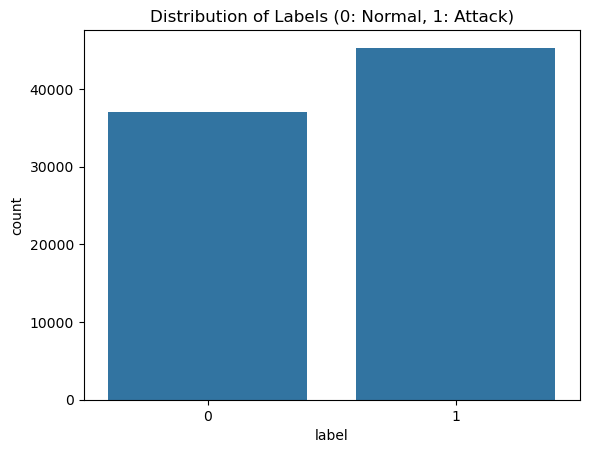

In [17]:
# Plot distribution of labels
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels (0: Normal, 1: Attack)')
plt.show()


##### Label Distribution
This plot shows the balance between normal (0) and attack (1) traffic in the dataset. Imbalance is common in network datasets, so we may need techniques like SMOTE or class weighting to handle this during model training.
